In [3]:
import idx2numpy
import scipy
from scipy import ndimage
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from pylab import rcParams
from bokeh.plotting import figure, show, output_file
rcParams['figure.figsize'] = 5, 5
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from PIL import Image
from StringIO import StringIO
import base64
import pprint
from sklearn.decomposition import RandomizedPCA
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import RandomizedPCA
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

# Load images

In [4]:
images = idx2numpy.convert_from_file(open('train-images.idx3-ubyte', 'rb'))
labels = idx2numpy.convert_from_file(open('train-labels.idx1-ubyte', 'rb'))

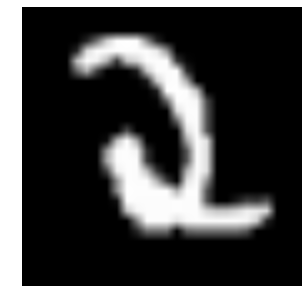

NUMBER
2


In [5]:
def Show(n):
    plt.imshow(images[n], cmap=plt.cm.gray)
    plt.axis('off')
    plt.show()
    print "NUMBER"
    print labels[n]
    
Show(400)

# Vectorize images

In [6]:
vectorized_images = []
for im in images:
    b=[]
    for row in im:
        for d in row:
            b.append(d)
    vectorized_images.append(b)

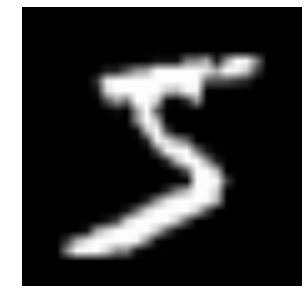

In [7]:
def imageFromVector( vec ):
    l = int(np.sqrt( len(vec) ))
    I = np.zeros((l,l))
    k = 0
    for i in range(0,l):
        for j in range(0,l):
            I[i,j] = vec[k]
            k+=1
            
    return I
            
I = imageFromVector(vectorized_images[0] )
plt.imshow( I, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

# group all vectors

In [8]:
print len(vectorized_images[0])
M_vecs = np.vstack( [v for v in vectorized_images] ).transpose()
print M_vecs.shape

784
(784L, 60000L)


# perform PCA

In [9]:
from sklearn.decomposition import FastICA, PCA

NB_COMPONENTS = 1

pca = PCA(n_components = NB_COMPONENTS)
pca.fit(M_vecs)
vecs_pca = pca.fit_transform(M_vecs)
print vecs_pca.shape
vecs_restored = pca.inverse_transform(vecs_pca).transpose()

(784L, 1L)


In [13]:
vecs_restored = list(np.array(vecs_restored).reshape(-1,))

In [ ]:
print vecs_restored

In [ ]:
imageFromVector( vecs_re)